##Neural network su MNIST

Neural network in TensorFlow 2.x, su database MNIST.

Da: [link](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb#scrollTo=2tRmdq_8CaXb).

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  print("Problem with TensorFlow version")
  pass

#tf.keras.backend.clear_session()  # For easy reset of notebook state.

print("Done")

Done


In [0]:
#Import per interoperabilità python 2-3 (in teoria)
#from __future__ import absolute_import, division, print_function, unicode_literals

#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


##Importing dataset.

Posso importare direttamente da TensorFlow

In [0]:
# Import tensorflow's MNIST data handle
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**Formato database**, 60k immagini nel training set, ognuna rappresentata come 28x28 pixels;

60k etichette.

In [0]:
print(train_images.shape)
print(len(train_labels))

(60000, 28, 28)
60000


Ogni **etichetta** è un intero tra 0 e 9

In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Ci sono 10k immagini nel test set;

ci sono 10k etichette nel test set;

In [0]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


**Preprocessing dei dati**

I dati devono essere preprocessati prima di addestrare la NN.

Ispezionando la prima immagine nel training set notiamo i valori dei *pixel* non nel range ottimale tra 0 e 1.

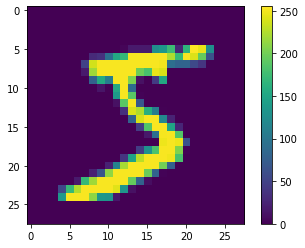

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scalo i valori nel range tra 0 e 1 prima di passarli al modello NN. Per farlo, divido il valore per 255.

Importante che *training set* e *test set* siano processati nello stesso modo.

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

print("Done")

Done


Verifico il formato guardando alle prime 15 immagini del *training set* 

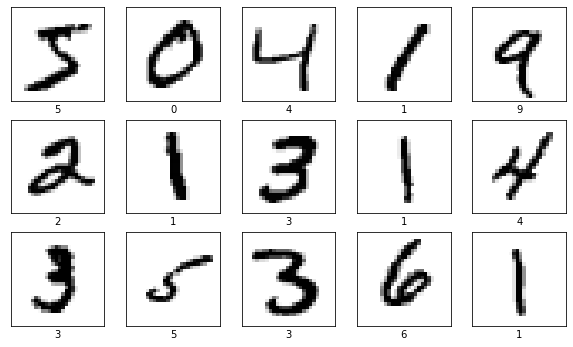

In [0]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

##Costruzione del modello

**Set up dei layers**


In [0]:
model = ks.Sequential([
    ks.layers.Flatten(input_shape=(28, 28)),
    ks.layers.Dense(128, activation='relu'),
    ks.layers.Dense(10, activation='softmax')
])

print("Done")

Done


Il primo layer del network, *tf.keras.layers.Flatten*, trasforma il formato delle immagini da un array bidimensionale ad un array monodimensionale (28x28 px -> 28*28=784 px).

Questo *layer* non ha parametri da imparare, è solo una manipolazione dei dati.

Dopo il *flattening* dei pixel, la network consiste di una sequenza di due layer *tf.keras.layers.Dense*. Questi sono neural layers "densamente" connessi, o pienamente connessi. Il primo layer *Dense* ha 128 nodi; il secondo e ultimo layer è un 10-node *softmax* layer che ritorna un array di 10 probability scores che sommano a 1. Ogni nodo contiene un punteggio che indica con che probabilità l'immagine corrente appartiene ad una delle 10 classi.

**Compilare il modello**

Sono necessari alcuni settings prima di completare il modello. Questi sono aggiunti durante la fase *compile*:
* *Loss function* — Misura quanto accurato è il modello durante il training. Si vuole minimizzare la funzione affinchè "viri" nella direzione giusta.
* *Optimizer* — è il modo in cui il modello è aggiornato basandosi sui dati che vede e la loss function.
* *Metrics* — Usata per monitorare la fase di training e di testing. Il seguente esempio usa l'*accuracy*, la frazione delle immagini che sono correttamente classificate.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


print(model.summary())
print("Done")

Done


##Traning del modello
Training diviso in step:
1. Passare ("feeding") il training data al modello. Nell'esempio, il training data sono  gli array `train_images` e `train_labels`.
2. Il modello impara ad associare immagini e labels.
3. Si chiede al modello di fare predizioni su un test set; in questo esempio, l'array `test_images`. Verifica che le previsioni corrispondano alle labels dall'array `test_labels`.

Per iniziare il training, chiamiamo il metodo `model.fit`; chiamato così perchè "fits" il modello al training data:

In [0]:
model.fit(train_images, train_labels, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2563 - accuracy: 0.9265
Epoch 2/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1098 - accuracy: 0.9674
Epoch 3/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0767 - accuracy: 0.9768
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0579 - accuracy: 0.9823
Epoch 5/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0439 - accuracy: 0.9867
Epoch 6/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0358 - accuracy: 0.9887
Epoch 7/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0270 - accuracy: 0.9919
Epoch 8/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0226 - accuracy: 0.9932
Epoch 9/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0194 - accuracy: 0.9939
Epoch 10/10
60

Come il modello viene allenato, vengono mostrate le metriche di *loss* e di *accuracy*. Questo modello raggiunge una accuratezza di 99.5% sul training data.

##Valutazione accuratezza
Paragono come il modello si comporta su test dataset:

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.0682 - accuracy: 0.9801

Test accuracy: 0.9801


Come previsto, l'accuratezza sul test dataset è minore rispetto a quella sul training dataset (99.5% a 97.9%). Ciò è chiamato *overfitting*.

##Fare predizioni
Col modello addestrato, possiamo usarlo per fare predizioni su alcune immagini.

In [0]:
predictions = model.predict(test_images)
print("Done")

Done


Qui il modello ha predetto la label per ogni immagine nel testing set.

Guardo la prima predizione:

In [0]:
predictions[0]

array([1.23855122e-08, 1.06768405e-11, 3.25763352e-07, 5.57121723e-07,
       4.78003774e-15, 3.55540375e-10, 6.50560426e-16, 9.99999046e-01,
       1.02664566e-09, 2.60573003e-08], dtype=float32)

La predizione è un array di 10 numeri. Rappresentano la "confidence" del modello sulla corrispondenza dell'immagine con ognuno dei 10 differenti label; per vedere la label con cui ha più "confidence":

In [0]:
np.argmax(predictions[0])

7

Ossia 7.

Guardo l'etichetta e vedo se è corretto.

In [0]:
test_labels[0]

7

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

print("Done")

Done


Guardo l'immagine 0, la predizione e all'array di predizione.

Previsioni corrette delle labels sono blu e le incorrette sono rosse.

Il numero fornisce la percentuale per la label predetta.

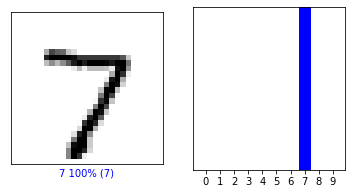

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

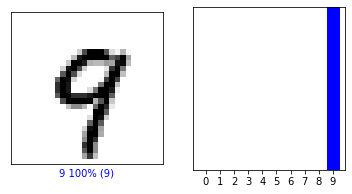

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Faccio il plot di diverse immagini con le loro predizioni. Il modello può essere sbagliato anche quando molto "confidente".

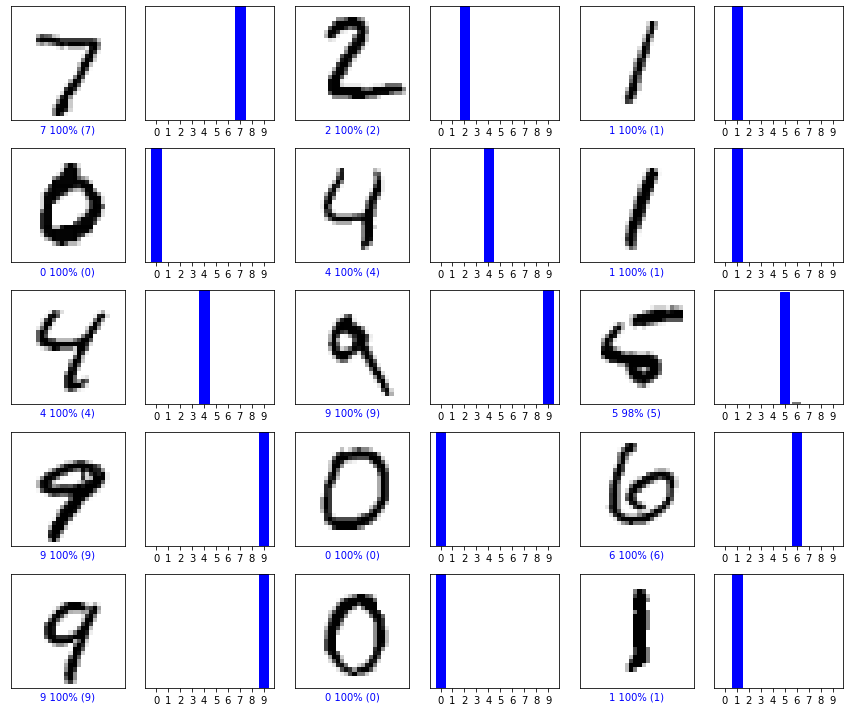

In [0]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Infine, uso il modello addestrato per fare una predizione su una singola immagine.

In [0]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Modelli `tf.keras` sono ottimizzati per fare predizioni su *batch*, o collezioni, di esempi alla volta. Pertanto anche se la predizione è su 1 immagine, bisogna aggiungerla ad una lista.

In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Ora predico la corretta label per questa immagine:

In [0]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.8812328e-09 4.1032881e-06 9.9998939e-01 6.5456520e-06 1.1634003e-19
  1.8989857e-08 1.0700712e-11 6.7546812e-18 2.0780176e-10 4.6261931e-13]]


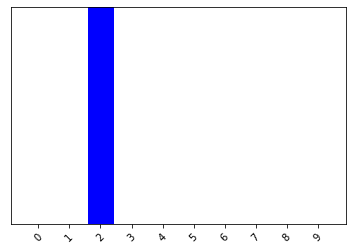

In [0]:
class_names = [0,1,2,3,4,5,6,7,8,9]
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` ritorna una lista di liste - una lista per ogni immagine nel batch di dati.

Prendo le predizioni per il nostro batch (di 1 elemento) di dati:

In [0]:
np.argmax(predictions_single[0])

2

Che dovrebbe predirre la label come atteso.